<br>

## __Exercício: Detecção de Anomalias__

<br>

__1:__

Utilizando a classe DetectorAnomalias criada ao longo do módulo, __vamos avaliar um detector de anomalias.__

O dataset utilizado pode ser importado através da função getData. 

Nesse conjunto de dados, possuímos 6 variáveis explicativas, $X_1, .., X_6$ e uma variável com a marcação se a instância é uma anomalia ou não.

Utilizando a __metodolodia__ discutida ao longo do módulo, __teste diferentes modelos (variando o limiar $\epsilon$)__ a fim de encontrar o que __melhor fita os dados.__

Justifique as escolhas do $\epsilon$, bem como quais as métricas de performance abordadas. 

<br>

__2:__ 

Aborde o problema num contexto de aprendizado supervisionado, ou seja, treine modelos de classificação binária com o objetivo de detectar anomalias.

Compare os resultados entre as metodologias.

In [168]:
import pandas as pd 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [169]:
class DetectorAnomalias():
    
    def __init__(self, epsilon):
        self.epsilon = epsilon
        
    def fit(self, X):
        medias = X.mean(axis = 0)
        desvios = X.std(axis = 0)
        gaussianas = [st.norm(loc = m, scale = d) for m, d in zip(medias, desvios)]  
        self.gaussianas = gaussianas
        self.X = X
        
    def prob(self, x):
        p = 1
        for i in range(self.X.shape[1]):
            gaussiana_i = self.gaussianas[i]
            x_i = x[i]
            p *= gaussiana_i.pdf(x_i)
        return p
    
    def isAnomaly(self, x):
        return int(np.where(self.prob(x) < self.epsilon, 1, 0))

In [170]:
def getData():
    return pd.read_csv("dataframe_anomalias_exercicio.csv")

In [171]:
df = getData()
df

,x1,x2,x3,x4,x5,x6,anomalia
0,7.731153,23.299155,-0.367453,4.715372,9.306179,16.780965,0.0
1,11.466833,16.943695,-0.245131,7.060311,10.462826,19.821289,0.0
2,11.501272,20.196011,1.206049,-4.957189,7.771262,19.100079,0.0
3,10.893921,16.072385,2.738045,-3.684228,7.373334,23.225524,0.0
4,10.091706,19.253894,0.996895,-9.504052,8.883988,17.903298,0.0
...,...,...,...,...,...,...,...
10095,11.192286,18.451987,-0.953650,-14.362996,10.875826,17.056541,0.0
10096,12.014177,19.461815,1.985099,-7.119190,11.079922,17.582755,0.0
10097,10.745460,18.175951,0.206037,-1.897015,9.888329,17.963324,0.0
10098,9.893969,22.333270,-1.465981,4.137382,7.690620,21.570097,0.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        10100 non-null  float64
 1   x2        10100 non-null  float64
 2   x3        10100 non-null  float64
 3   x4        10100 non-null  float64
 4   x5        10100 non-null  float64
 5   x6        10100 non-null  float64
 6   anomalia  10100 non-null  float64
dtypes: float64(7)
memory usage: 552.5 KB


In [173]:
df.anomalia.value_counts()

0.0    10046
1.0       54
Name: anomalia, dtype: int64

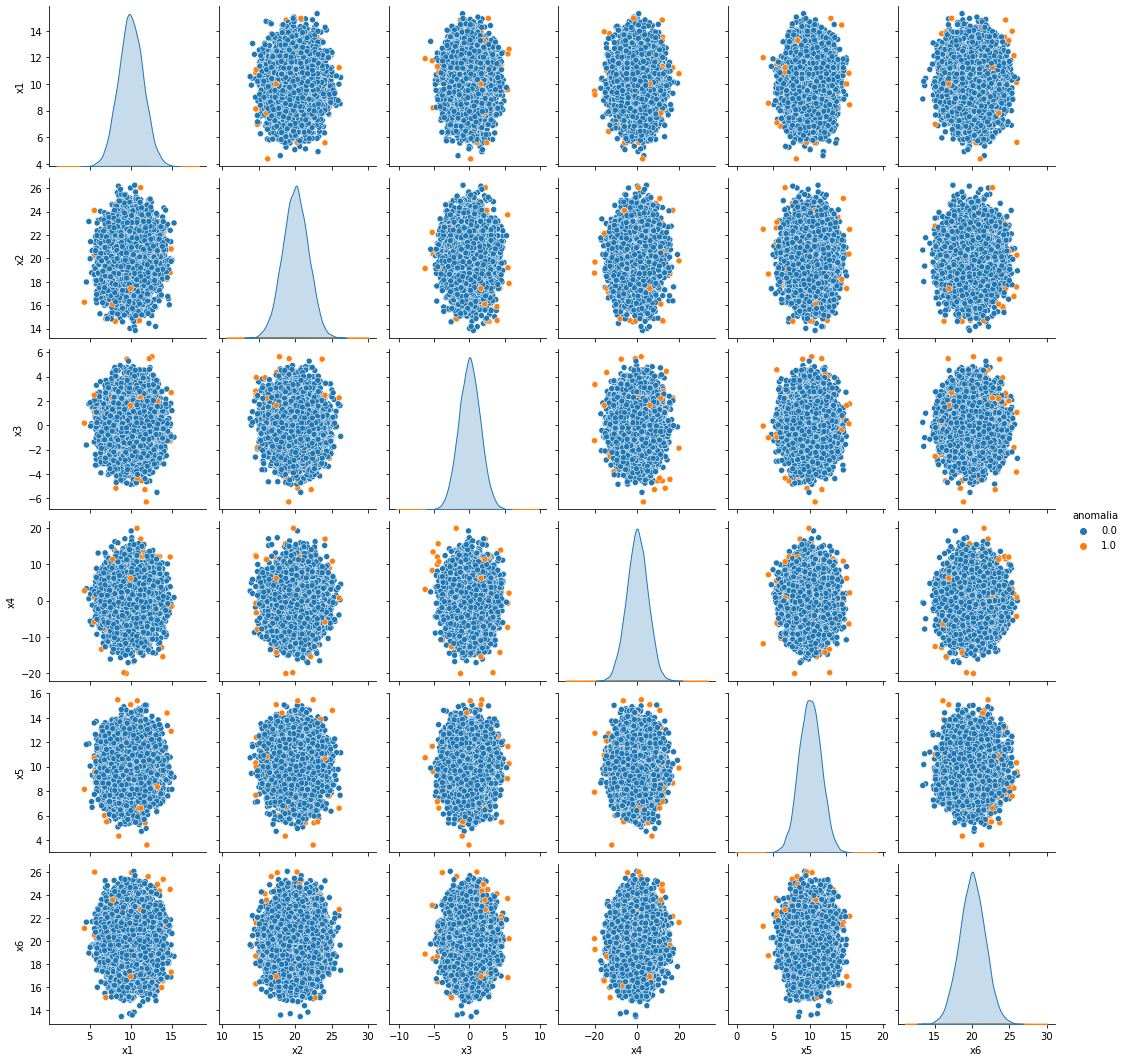

In [174]:
# O gráfico vai mostrar as anomalias em cor laranja

sns.pairplot(df, hue='anomalia')

In [175]:
# separação do dataframe em linhas com anomalias e sem anomalias

df_com_anomalias = df[df['anomalia'] == 1]
df_sem_anomalias = df[df['anomalia'] == 0]

 #### Divisão nos dados:
 > Dataset de treino: 6046 instâncias não anômalas.

 > Dataset de validação: 2000 instâncias não anômalas & 27 instâncias anômalas.

 > Dataset de teste: 2000 instâncias não anômalas & 27 instâncias anômalas.

In [176]:
df_treino = df_sem_anomalias[0:6046]
df_treino.anomalia.value_counts()

0.0    6046
Name: anomalia, dtype: int64

In [177]:
validacao_sem_anomalia = df_sem_anomalias[6046:8046]
validacao_sem_anomalia.anomalia.value_counts()

0.0    2000
Name: anomalia, dtype: int64

In [178]:
teste_sem_anomalia = df_sem_anomalias[8046:10046]
teste_sem_anomalia.anomalia.value_counts()

0.0    2000
Name: anomalia, dtype: int64

In [179]:
validacao_com_anomalia = df_com_anomalias[0:27]
validacao_com_anomalia.anomalia.value_counts()

1.0    27
Name: anomalia, dtype: int64

In [180]:
teste_com_anomalia = df_com_anomalias[27:54]
teste_com_anomalia.anomalia.value_counts()

1.0    27
Name: anomalia, dtype: int64

In [181]:
df_validacao = pd.merge(validacao_com_anomalia, validacao_sem_anomalia, how = 'outer')

In [182]:
df_teste = pd.merge(teste_com_anomalia, teste_sem_anomalia, how = 'outer')

In [183]:
X_treino = df_treino.drop('anomalia', axis =1).values
y_treino = df_treino.anomalia.values

X_valid = df_validacao.drop('anomalia', axis =1).values
y_valid = df_validacao.anomalia.values

X_test = df_teste.drop('anomalia', axis =1).values
y_test = df_teste.anomalia.values

In [184]:
X_treino.shape

(6046, 6)

In [185]:
#instanciando o algoritmo
ann = DetectorAnomalias(epsilon = 0.001)
ann.fit(X_treino)

In [186]:
#fazendo testes
x = X_treino[0, ]
x

array([ 7.73115287, 23.29915461, -0.36745342,  4.71537151,  9.30617937,
       16.78096518])

In [187]:
ann.prob(x)

4.1112641769790377e-07

In [188]:
ann.isAnomaly(x)

1

In [189]:
x_valid = X_valid[0, ]
x_valid

array([14.80391535, 18.79012675, -1.30187946, 11.96613235,  9.36580691,
       24.51271095])

In [190]:
print(ann.prob(x_valid))
print(ann.isAnomaly(x_valid))

4.141276926156468e-10
1


In [191]:
# Usando RandomForestClassifier

forest= RandomForestClassifier(n_estimators=100)
forest.fit(X_treino, y_treino)

RandomForestClassifier()

In [192]:
previsoes = forest.predict(X_valid)
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [193]:
y_valid

array([1., 1., 1., ..., 0., 0., 0.])

In [194]:
accuracy_score(y_valid, previsoes)

0.986679822397632

In [195]:
# Usando KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_valid, y_valid)

KNeighborsClassifier(n_neighbors=10)

In [196]:
previsoes = knn.predict(X_test)
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [197]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [198]:
accuracy_score(y_valid, previsoes)

0.986679822397632